эффективность =  0.9166


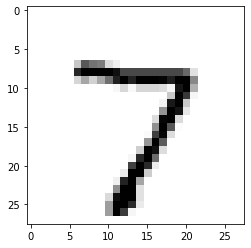

In [89]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline


class neuralnet():
    """"Класс нейронная сеть"""
    def __init__(self,inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        #коэфф обучения
        self.lr = learningrate
        # создадим матрицы связей между тремя узлами
        self.wih = (numpy.random.rand(self.hnodes, self.inodes)-0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes)-0.5)
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

    def train(self,inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        targets = numpy.array(targets_list, ndmin=2).T
        # считаем ошибку
        output_errors = targets - final_outputs
        # ошибки скрытого = веса скрыт--выход * ошибки выход
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # обновляем весовые коэффициенты связей между скрытым и выходным слоями
        self.who += self.lr * numpy.dot((output_errors * final_outputs *
        (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # а теперь между входным и скрытым слоями
        self.wih += self.lr * numpy.dot((hidden_errors*
            hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
        pass

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

def printim(all_values):
    image_array = numpy.asfarray(all_values[1:]).reshape((28,28)) 
    matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
    
# Создадим нейронную сеть
inputnodes = 784
hiddennodes = 100
outputnodes = 10
learningrate = 0.3

n = neuralnet(inputnodes,hiddennodes,outputnodes,learningrate)

data_file = open("mnist_train2.csv", 'r') 
data_list = data_file.readlines() 
data_file.close()

for record in data_list:
    all_values = record.split(',')
    # масштабируем  и смещаем входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(outputnodes) + 0.01
    # all_values[0] - целевое маркерное значение для данной записи 
    targets[int(all_values[0])] =0.99
    n.train(inputs, targets) 
    pass

test_file = open("mnist_test.csv", 'r') 
test_list = test_file.readlines() 
test_file.close()

# протестируем на 10 данных нашу нейронную сеть
score = []
for record in test_list:
    all_values = record.split(',')
    correct_ans = int(all_values[0]) 
    #print(correct_ans, "правильный ответ")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    answer = numpy.argmax(outputs)
    #print(answer, "ответ сети")
    if (answer == correct_ans) : 
        score.append(1)
    else:
        score.append(0) 
    pass
score_card = numpy.asarray(score)
print('эффективность = ',score_card.sum()/score_card.size)